<a href="https://colab.research.google.com/github/MarcosAutuori/My_FreeBook-FastAi-_Course/blob/master/05_pet_breeds_resumo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT - DLS

In [ ]:
#hide
from google.colab import drive
drive.mount('/content/drive')
! pip install --upgrade torchvision==0.12
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
#hide
from fastbook import *
from fastai.vision.all import *

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 1.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.2+cu118
    Uninstalling torchvision-0.15.2+cu118:
      Successfully uninstalled torchvision-0.15.2+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.11.0 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.11.0 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.11.0 which is incompatible.
     ━

In [ ]:
path = untar_data(URLs.PETS)
Path.BASE_PATH = path


In [ ]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),  #splitter is a callable which, when called with items, returns a tuple of iterables
                                                    #representing the indices of the training and validation data.
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

#TRAIN - CASOS

##Train 1
fine_tune treina apenas a última camada.

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2) # lr = 0.001

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.509817,0.349628,0.117050,01:19


epoch,train_loss,valid_loss,error_rate,time
0,0.494812,0.315516,0.102165,01:19
1,0.324424,0.257203,0.085250,01:20


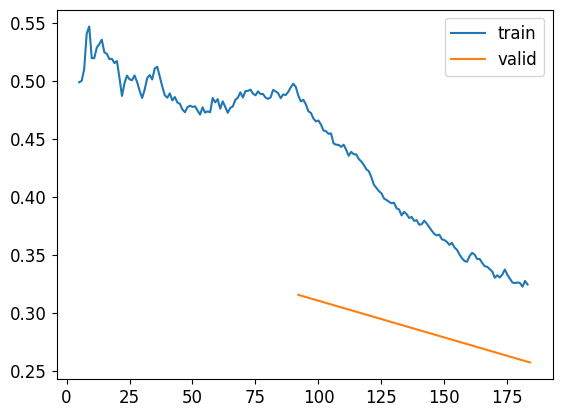

In [ ]:
learn.recorder.plot_loss()

In [ ]:
m_name = 'Pets_Train_01.pkl'

In [ ]:
learn.export(f"/content/gdrive/MyDrive/Colab Notebooks/fast.ai/fastbook/Modelos/{m_name}")

In [ ]:
learn = load_learner(f"/content/gdrive/MyDrive/Colab Notebooks/fast.ai/fastbook/Modelos/{m_name}")

In [ ]:
#No caso de carregar 'learn'
#Montar 'dls'
learn.dls = dls
learn.eval()
learn

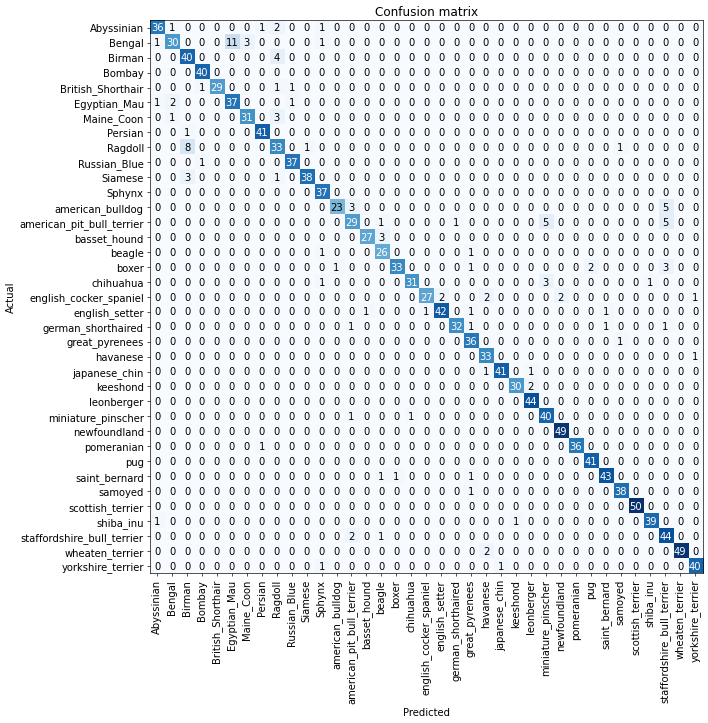

In [ ]:
#width 600
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

[('Bengal', 'Egyptian_Mau', 11),
 ('Ragdoll', 'Birman', 8),
 ('american_bulldog', 'staffordshire_bull_terrier', 5),
 ('american_pit_bull_terrier', 'miniature_pinscher', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5)]

In [ ]:
learn.lr

0.001

##Train 2

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

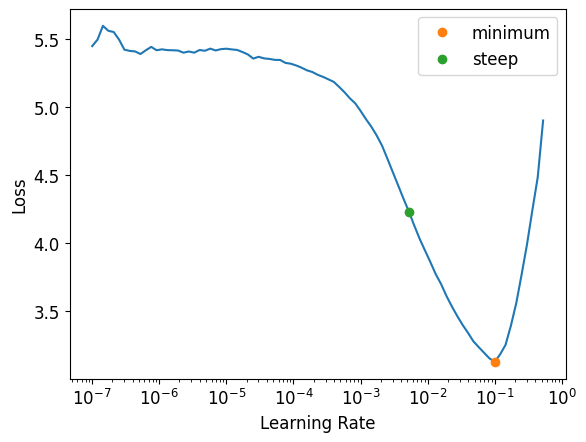

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [ ]:
print(f'lr: {lr_min} | steep: {lr_steep}')

lr: 0.010000000149011612 | steep: 0.005248074419796467


In [ ]:
#Train 2
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.257378,0.346750,0.117727,01:15


epoch,train_loss,valid_loss,error_rate,time
0,0.524177,0.415984,0.127199,01:18
1,0.363427,0.227372,0.077131,01:17


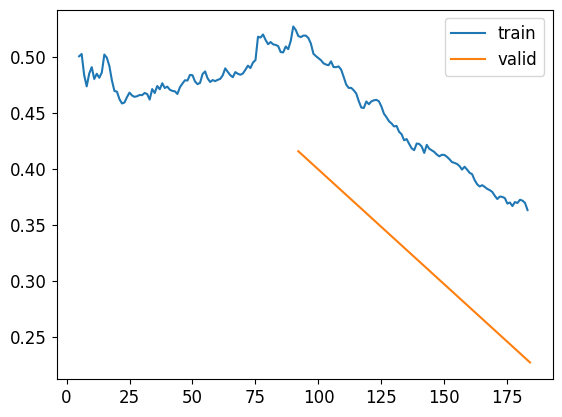

In [ ]:
learn.recorder.plot_loss()

In [ ]:
m_name = 'Pets_Train_02.pkl'

In [ ]:
learn.export(f"/content/gdrive/MyDrive/Colab Notebooks/fast.ai/fastbook/Modelos/{m_name}")

In [ ]:
learn = load_learner(f"/content/gdrive/MyDrive/Colab Notebooks/fast.ai/fastbook/Modelos/{m_name}")

In [ ]:
#No caso de carregar 'learn'
#Montar 'dls'
learn.dls = dls
learn.eval()
learn

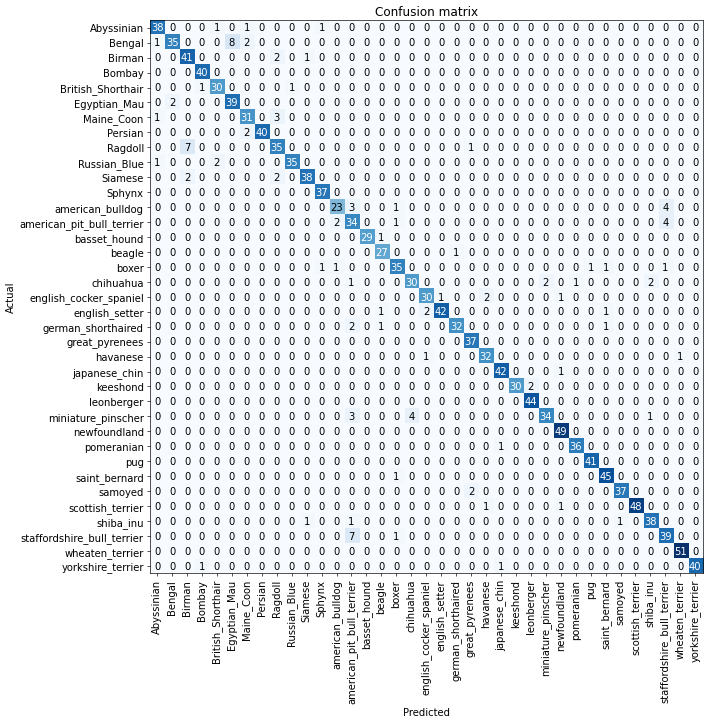

In [ ]:
#width 600
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

[('Bengal', 'Egyptian_Mau', 8),
 ('Ragdoll', 'Birman', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7)]

##Train 3

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.137797,0.321945,0.107578,01:18
1,0.524020,0.245832,0.074425,01:14
2,0.319663,0.220552,0.064953,01:17


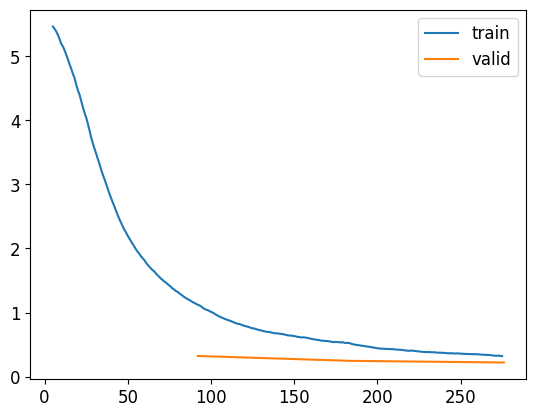

In [ ]:
learn.recorder.plot_loss()

In [ ]:
m_name = 'Pets_Train_03.pkl'

In [ ]:
learn.export(f"/content/gdrive/MyDrive/Colab Notebooks/fast.ai/fastbook/Modelos/{m_name}")

In [ ]:
learn = load_learner(f"/content/gdrive/MyDrive/Colab Notebooks/fast.ai/fastbook/Modelos/{m_name}")

In [ ]:
#No caso de carregar 'learn'
#Montar 'dls'
learn.dls = dls
learn.eval()
learn

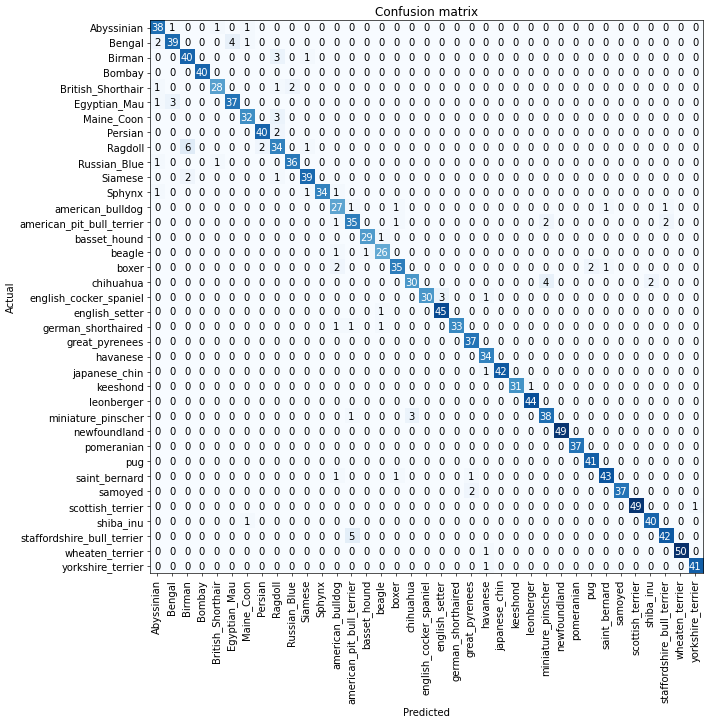

In [ ]:
#width 600
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

[('Ragdoll', 'Birman', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5)]

##Train 4

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.161074,0.335064,0.108931,01:27
1,0.525448,0.237941,0.078484,01:19
2,0.331376,0.212970,0.069689,01:15


epoch,train_loss,valid_loss,error_rate,time
0,0.254376,0.208098,0.067659,01:19
1,0.246458,0.203699,0.066982,01:21
2,0.249418,0.196217,0.066306,01:23
3,0.210686,0.188849,0.062246,01:18
4,0.196337,0.191319,0.064276,01:17
5,0.192605,0.184678,0.060893,01:19
6,0.171870,0.185809,0.062923,01:20
7,0.162615,0.182722,0.060893,01:18
8,0.138614,0.178468,0.065629,01:18
9,0.125851,0.181722,0.061570,01:18


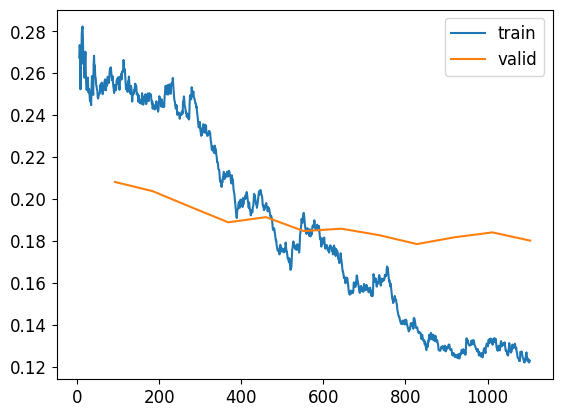

In [ ]:
learn.recorder.plot_loss()

In [ ]:
m_name = 'Pets_Train_04.pkl'

In [ ]:
learn.export(f"/content/gdrive/MyDrive/Colab Notebooks/fast.ai/fastbook/Modelos/{m_name}")

In [ ]:
learn = load_learner("/content/gdrfive/MyDrive/Colab Notebooks/fast.ai/fastbook/Modelos/{m_name}")

In [ ]:
#No caso de carregar 'learn'
#Montar 'dls'
learn.dls = dls
learn.eval()
learn

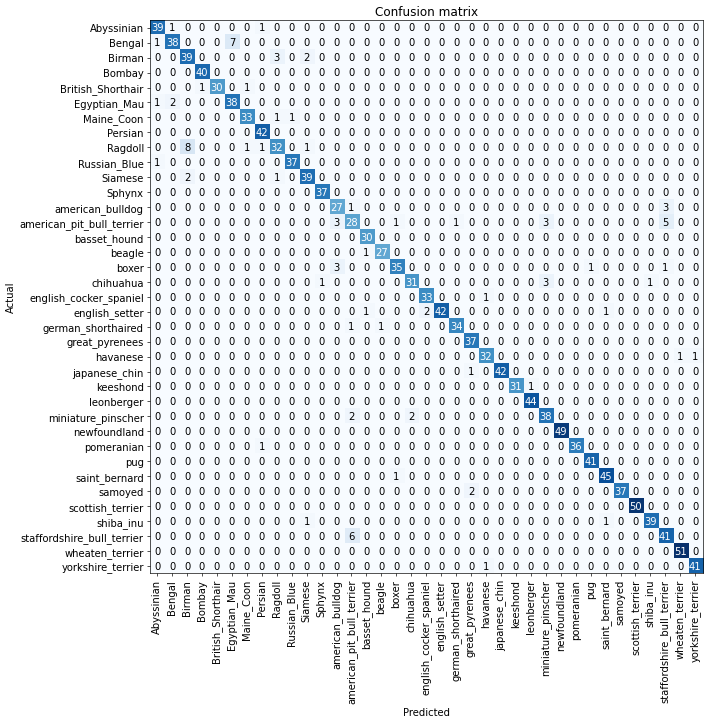

In [ ]:
#width 600
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

[('Ragdoll', 'Birman', 8),
 ('Bengal', 'Egyptian_Mau', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5)]

##Train 5

In [ ]:
from fastai.callback.fp16 import *
learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.290687,0.281839,0.094723,01:17
1,0.586052,0.253006,0.075778,01:19
2,0.408191,0.234545,0.074425,01:16


epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.250864,0.246851,0.069012,01:18
1,0.291398,0.360220,0.099459,01:16
2,0.255687,0.268345,0.084574,01:15
3,0.170663,0.213676,0.066306,01:18
4,0.090624,0.179022,0.056834,01:15
5,0.059834,0.172185,0.053451,01:15


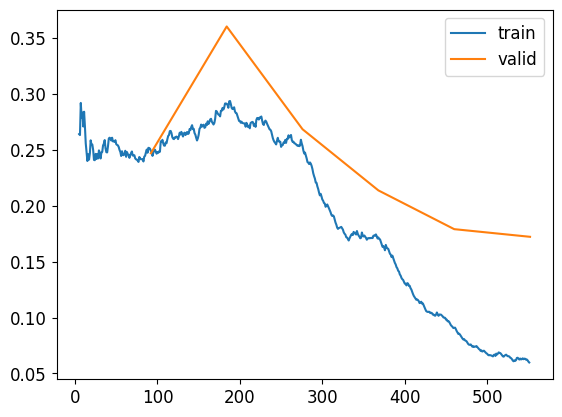

In [ ]:
learn.recorder.plot_loss()

In [ ]:
m_name = 'Pets_Train_05.pkl'

In [ ]:
learn.export(f"/content/gdrive/MyDrive/Colab Notebooks/fast.ai/fastbook/Modelos/{m_name}")

In [ ]:
learn = load_learner(f"/content/gdrive/MyDrive/Colab Notebooks/fast.ai/fastbook/Modelos/{m_name}")

In [ ]:
#No caso de carregar 'learn'
#Montar 'dls'
learn.dls = dls
learn.eval()
learn

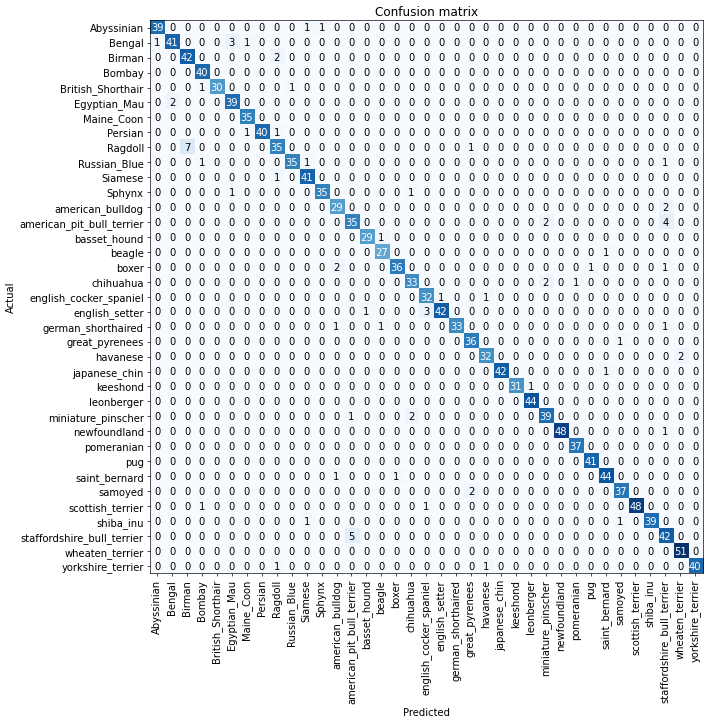

In [ ]:
#width 600
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

[('Ragdoll', 'Birman', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5)]

##Comparação dos treinos

Teste 1

```
from fastai.callback.fp16 import *
learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)
```

[('Bengal', 'Egyptian_Mau', 11),
 ('Ragdoll', 'Birman', 8),
 ('american_bulldog', 'staffordshire_bull_terrier', 5),
 ('american_pit_bull_terrier', 'miniature_pinscher', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5)]

Teste 2

```
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))
```


[('Bengal', 'Egyptian_Mau', 8),
 ('Ragdoll', 'Birman', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7)]

Teste 3

```
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
```

[('Ragdoll', 'Birman', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5)]

Teste 4

```
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))
```


[('Ragdoll', 'Birman', 8),
 ('Bengal', 'Egyptian_Mau', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5)]

Teste 5

```
from fastai.callback.fp16 import *
learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)
```


[('Ragdoll', 'Birman', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5)]

#VIEW


In [ ]:
import torch

In [ ]:
# tensor
some_tensor = torch.arange(0, 36) # creates a tensor of shape (36)
some_tensor.shape

torch.Size([36])

In [ ]:
some_tensor_reshaped = some_tensor.view(3, 12) # creates a tensor of shape (3, 12) => 3*12 = 36
some_tensor_reshaped.shape

torch.Size([3, 12])

In [ ]:
some_tensor_reshaped_1 = some_tensor.view(3, -1) # creates a tensor of shape (3, 12) => 3*12 = 36
some_tensor_reshaped_1.shape                     # com '-1' não é necessário saber o tamanho da outra dimensão

torch.Size([3, 12])

In [ ]:
some_tensor_reshaped_1B = some_tensor.view(4, -1) # creates a tensor of shape (4, 9) => 4*9 = 36
some_tensor_reshaped_1B.shape                     # com '-1' não é necessário saber o tamanho da outra dimensão

torch.Size([4, 9])

In [ ]:
some_tensor_reshaped_1B = some_tensor.view(12, -1) # creates a tensor of shape (12, 3) => 12*3 = 36
some_tensor_reshaped_1B.shape                      # com '-1' não é necessário saber o tamanho da outra dimensão

torch.Size([12, 3])

In [ ]:
some_tensor_reshaped_3 = some_tensor_reshaped_2.view(-1, 1) # creates a tensor of shape (36,1) => 36*1 = 36
some_tensor_reshaped_3.shape, some_tensor_reshaped_3
# (torch.Size([36, 1]),
# tensor([[ 0],
#        [ 1],
#        [ 2],
#         ...
#        [34],
#        [35]]))

In [ ]:
some_tensor_reshaped_4 = some_tensor_reshaped_3.view(1, -1) # creates a tensor of shape (1,36 )
some_tensor_reshaped_4.shape, some_tensor_reshaped_4
# (torch.Size([1, 36]),
#tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
#         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]]))

(torch.Size([1, 36]),
 tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]]))

In [ ]:
some_tensor_reshaped_4_squeeze = some_tensor_reshaped_4.squeeze() #Tira todas as dimensões size = '1'
some_tensor_reshaped_4_squeeze.shape

torch.Size([36])

In [ ]:
some_tensor_reshaped_3_squeeze = some_tensor_reshaped_3.squeeze()  #Tira todas as dimensões size = '1'
some_tensor_reshaped_3_squeeze.shape

torch.Size([36])

In [ ]:
some_tensor_reshaped_4_squeeze = some_tensor_reshaped_4.squeeze(0) #Tira a dimensõesão size = '1' da dim=0
some_tensor_reshaped_4_squeeze.shape

torch.Size([36])

In [ ]:
some_tensor_reshaped_3_squeeze = some_tensor_reshaped_3.squeeze(0) #Tira a dimensõesão size = '1' da dim=0. Como não tem fica igual
some_tensor_reshaped_3_squeeze.shape

torch.Size([36, 1])

In [ ]:
some_tensor_reshaped_4_squeeze = some_tensor_reshaped_4.squeeze(1) #Tira a dimensõesão size = '1' da dim=1. Como não tem fica igual
some_tensor_reshaped_4_squeeze.shape

torch.Size([1, 36])

In [ ]:
# torch.Size([36, 1])
some_tensor_reshaped_3_squeeze = some_tensor_reshaped_3.squeeze(1) #Tira a dimensõesão size = '1' da dim=1
some_tensor_reshaped_3_squeeze.shape

torch.Size([36])

In [ ]:
some_tensor_reshaped_3_squeeze_unsqueeze_0 = some_tensor_reshaped_3_squeeze.unsqueeze(0) #Adiciona a dimensõesão size = '1' da dim=0.
some_tensor_reshaped_3_squeeze_unsqueeze_0.shape, some_tensor_reshaped_3_squeeze_unsqueeze_0

(torch.Size([1, 36]),
 tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]]))

In [ ]:
some_tensor_reshaped_3_squeeze_unsqueeze_1 = some_tensor_reshaped_3_squeeze.unsqueeze(1) #Adiciona a dimensõesão size = '1' da dim=1.
some_tensor_reshaped_3_squeeze_unsqueeze_1.shape, some_tensor_reshaped_3_squeeze_unsqueeze_1
#(torch.Size([36, 1]),
#tensor([[ 0],
#        [ 1],
#        [ 2],
#         ...
#        [35]]))

In [ ]:
some_tensor_reshaped_3_unsqueeze_0 = some_tensor_reshaped_3.unsqueeze(0) #Adiciona a dimensõesão size = '1' da dim=0.
some_tensor_reshaped_3_unsqueeze_0.shape

torch.Size([1, 36, 1])

In [ ]:
some_tensor_reshaped_3_unsqueeze_1 = some_tensor_reshaped_3.unsqueeze(1) #Adiciona a dimensõesão size = '1' da dim=1.
some_tensor_reshaped_3_unsqueeze_1.shape, some_tensor_reshaped_3_unsqueeze_1
#(torch.Size([36, 1, 1]),
#tensor([[[ 0]],
#        [[ 1]],
#        [[ 2]],
#         ...
#        [[35]]]))

In [ ]:
some_tensor_reshaped_3_unsqueeze_2 = some_tensor_reshaped_3.unsqueeze(2) #Adiciona a dimensõesão size = '1' da dim=2.
some_tensor_reshaped_3_unsqueeze_2.shape, some_tensor_reshaped_3_unsqueeze_2
#(torch.Size([36, 1, 1]),
#tensor([[[ 0]],
#        [[ 1]],
#        [[ 2]],
#         ...
#        [[35]]]))
# Neste caso fica igual ao anterior, mas
# com torch.size(6,1,2) fica diferente

In [ ]:
teste = torch.ones(6,2)
teste.shape

torch.Size([6, 2])

In [ ]:
teste_unsqueeze_0 = teste.unsqueeze(0)
teste_unsqueeze_0.shape

torch.Size([1, 6, 2])

In [ ]:
teste_unsqueeze_1 = teste.unsqueeze(1)
teste_unsqueeze_1.shape

torch.Size([6, 1, 2])

In [ ]:
teste_unsqueeze_2 = teste.unsqueeze(2)
teste_unsqueeze_2.shape

torch.Size([6, 2, 1])

In [ ]:
some_tensor_reshaped_3_unsqueeze_2_squeezed = some_tensor_reshaped_3_unsqueeze_2.squeeze()
some_tensor_reshaped_3_unsqueeze_2_squeezed.shape

torch.Size([36])

# `*ARGS, **KWARGS`

https://pythonacademy.com.br/blog/args-e-kwargs-do-python

#CROSS ENTROPY LOSS

In [ ]:
import torch
import torch.nn.functional as TF

torch.manual_seed(42)

# Define some sample input data and labels
input_data = torch.randn(4, 10)  # 4 samples, 10 classes
#torch.Size([4, 10])

print(f'Input data: {input_data}')

labels = torch.LongTensor([2, 5, 1, 9])  # target class indices
#torch.Size([4])

# Compute the cross entropy loss
loss = TF.cross_entropy(input_data, labels)
#input_data.shape = torch.Size([4, 10])
#labels.shape = torch.Size([4])
#Neste caso size de dim=0 tem que ser igual.

# Print the computed loss
print(f"Cross entropy loss: {loss.item()}")

# Compute the softmax probabilities manually
softmax_probs = TF.softmax(input_data, dim=1)
#torch.Size([4, 10])

# Print the computed softmax probabilities
print(f"Softmax probabilities:\n{softmax_probs}")

# Compute the cross entropy loss manually
manual_loss = torch.mean(-torch.log(softmax_probs.gather(1, labels.view(-1,1)) ))
#labels.view(-1,1).shape = torch.Size([4, 1])
#softmax_probs.shape = torch.Size([4, 10])
#Neste caso size de dim=0 tem que ser igual.
#Também é necessáio que a quantidade de dimensões seja a mesma.
#labels.shape = torch.Size([n, 1])
#softmax_probs.shape = torch.Size([n, m])

# Print the manually computed loss
print(f"Manually computed loss: {manual_loss.item()}")

Input data: tensor([[ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784, -1.2345, -0.0431, -1.6047,
         -0.7521,  1.6487],
        [-0.3925, -1.4036, -0.7279, -0.5594, -0.7688,  0.7624,  1.6423, -0.1596,
         -0.4974,  0.4396],
        [-0.7581,  1.0783,  0.8008,  1.6806,  0.0349,  0.3211,  1.5736, -0.8455,
          1.3123,  0.6872],
        [-1.0892, -0.3553, -1.4181,  0.8963,  0.0499,  2.2667,  1.1790, -0.4345,
         -1.3864, -1.2862]])
Cross entropy loss: 2.588909864425659
Softmax probabilities:
tensor([[0.2990, 0.1927, 0.1072, 0.0053, 0.0858, 0.0127, 0.0417, 0.0087, 0.0205,
         0.2264],
        [0.0529, 0.0193, 0.0378, 0.0448, 0.0363, 0.1680, 0.4049, 0.0668, 0.0476,
         0.1216],
        [0.0192, 0.1206, 0.0914, 0.2203, 0.0425, 0.0566, 0.1979, 0.0176, 0.1524,
         0.0816],
        [0.0178, 0.0372, 0.0128, 0.1300, 0.0558, 0.5117, 0.1724, 0.0343, 0.0133,
         0.0147]])
Manually computed loss: 2.58890962600708


In [ ]:
input_data.shape

torch.Size([4, 10])

In [ ]:
softmax_probs.shape

torch.Size([4, 10])

In [ ]:
labels.unsqueeze(1)

tensor([[2],
        [5],
        [1],
        [9]])

In [ ]:
labels.view(-1,1).shape

torch.Size([4, 1])

In [ ]:
softmax_probs

tensor([[0.1936, 0.0155, 0.2301, 0.0981, 0.0215, 0.1825, 0.1010, 0.0241, 0.0116,
         0.1220],
        [0.0898, 0.1385, 0.0368, 0.0205, 0.0691, 0.1448, 0.2621, 0.0277, 0.1888,
         0.0220],
        [0.0214, 0.3850, 0.0963, 0.0935, 0.0225, 0.0215, 0.1450, 0.0666, 0.0469,
         0.1013],
        [0.0773, 0.0910, 0.0296, 0.2187, 0.0921, 0.1360, 0.0965, 0.0951, 0.1060,
         0.0577]])

In [ ]:
softmax_probs.gather(1, labels.view(-1,1))

tensor([[0.2301],
        [0.1448],
        [0.3850],
        [0.0577]])